# Modelling and Analysis of Complex Networks - Homework 2

## Setup

In [1]:
### Installing and Importing Packages

!pip install networkx
import networkx as nx

### Creating the graphs

#Create two NetworkX graph objects for Facebook and Twitter. The graph for Facebook is undirected but the graph for Twitter is Directed.
facebook = nx.Graph()
twitter = nx.DiGraph()

#Read the edges and construct the graph for Facebook -
#It is important to note that facebook's graph is undirected and that The 'ego' node does not appear, but it is assumed that they follow every node id that appears in the file.
f = open("Facebook-Ego/3437_2.edges", "r")
fb_edges = []

for line in f:
  node_1 = int(line.split(" ")[0])
  node_2 = int(line.split(" ")[1])
  fb_edges.append((node_1, node_2))
f.close()

facebook.add_edges_from(fb_edges)

#Read the edges and construct the graph for Twitter -
#It is important to note that Edges are directed (a follows b). The 'ego' node does not appear, but it is assumed that they follow every node id that appears in this file.
f = open("Twitter-Ego/6408382.edges", "r")
twitter_edges = []

for line in f:
  node_1 = int(line.split(" ")[0])
  node_2 = int(line.split(" ")[1])
  twitter_edges.append((node_1, node_2))
f.close()

twitter.add_edges_from(twitter_edges)

## (a) What is the degree distribution of the network? Please plot the distribution and attach it to your answer sheet.

In [3]:
import matplotlib.pyplot as plt
import collections

### Facebook

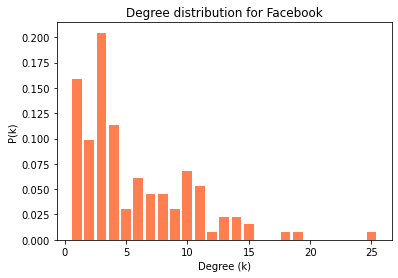

In [4]:
degrees = [d for _, d in facebook.degree()]

degree_count = collections.Counter(degrees)
deg, cnt = zip(*degree_count.items())

cnt = [float(c) / sum(cnt) for c in cnt]

plt.figure(figsize=(12, 6))
plt.bar(deg, cnt, color="coral", width=0.80)
plt.title("Degree distribution for Facebook")
plt.xlabel('Degree (k)')
plt.ylabel('P(k)')
plt.show()

### Twitter

Since it is a directed graph we differentiate between in-degrees and out-degrees

#### In-degrees

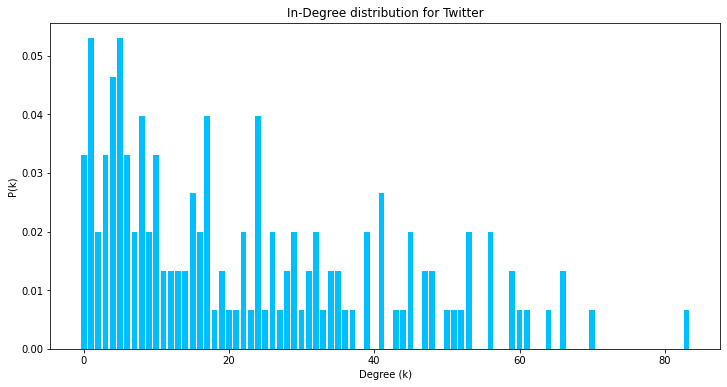

In [12]:
in_degrees = [d for _, d in twitter.in_degree()]

in_degree_count = collections.Counter(in_degrees)
deg, cnt = zip(*in_degree_count.items())

cnt = [float(c) / sum(cnt) for c in cnt]

plt.figure(figsize=(12, 6))
plt.bar(deg, cnt, color="deepskyblue", width=0.8)
plt.title("In-Degree distribution for Twitter")
plt.xlabel('Degree (k)')
plt.ylabel('P(k)')
plt.show()

#### Out-degrees

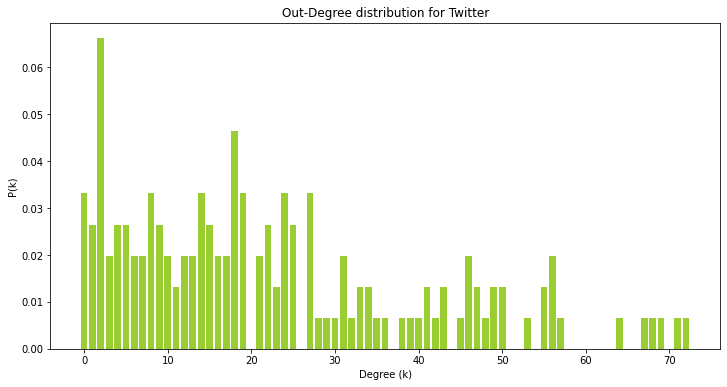

In [13]:
out_degrees = [d for _, d in twitter.out_degree()]

out_degree_count = collections.Counter(out_degrees)
deg, cnt = zip(*out_degree_count.items())

cnt = [float(c) / sum(cnt) for c in cnt]

plt.figure(figsize=(12, 6))
plt.bar(deg, cnt, color="yellowgreen", width=0.8)
plt.title("Out-Degree distribution for Twitter")
plt.xlabel('Degree (k)')
plt.ylabel('P(k)')
plt.show()

## (b) According to the degree distribution, what is the main difference between the chosen network and a random network with the same number of nodes? What may cause the difference?

The chosen networks follow a heavy tailed distributions with most nodes having few connections and therefore low degrees (often a power-law distribution). However, in a random network the distribution is (almost) a normal distribution centered around the average degree (Erdos-Renyi). This difference could be due to the fact that in real world networks such as facebook or twitter, there is a preferential attachment between people who are well-connected, meaning the more you are connected, the more likely you are to connect with people who are also connected creating a small number of "famous" nodes with high degrees and a majority of nodes with few connections. However, edges are placed between nodes randomly in a random network, which leads to a more uniform distribution of degrees without a highly connected minority.

## (c) What is the average path length of the network?

### Facebook

In [15]:
# check if the grah is connected
if nx.is_connected(facebook):
    avg_path_length_facebook = nx.average_shortest_path_length(facebook)
    print(f"Average path length for the Facebook network: {avg_path_length_facebook}")
# if not connected we compute the path length for the largest connected component
else:
    print("The Facebook graph is not connected, calculating for the largest component.")
    largest_component_facebook = max(nx.connected_components(facebook), key=len)
    subgraph_facebook = facebook.subgraph(largest_component_facebook)
    avg_path_length_facebook = nx.average_shortest_path_length(subgraph_facebook)
    print(f"Average path length for the largest component in Facebook network: {avg_path_length_facebook}")

The Facebook graph is not connected, calculating for the largest component.
Average path length for the largest component in Facebook network: 4.625429553264605


### Twitter

In [16]:
# check if the grah is STRONGLY connected
if nx.is_strongly_connected(twitter):
    avg_path_length_twitter = nx.average_shortest_path_length(twitter)
    print(f"Average path length for the Twitter network: {avg_path_length_twitter}")
# if not connected we compute the path length for the largest STRONGLY connected component
else:
    print("The Twitter graph is not strongly connected, calculating for the largest strongly connected component.")
    largest_scc_twitter = max(nx.strongly_connected_components(twitter), key=len)
    subgraph_twitter = twitter.subgraph(largest_scc_twitter)
    avg_path_length_twitter = nx.average_shortest_path_length(subgraph_twitter)
    print(f"Average path length for the largest strongly connected component in Twitter network: {avg_path_length_twitter}")


The Twitter graph is not strongly connected, calculating for the largest strongly connected component.
Average path length for the largest strongly connected component in Twitter network: 2.1319148936170214


## (d) Please randomly choose 5 nodes from the network, and calculate the clustering coefficients of these nodes, respectively.

In [17]:
import random

### Facebook

In [18]:
# select 5 nodes randomly
random_nodes = random.sample(list(facebook.nodes()), 5)

# calculate their clustering coefficient
fb_clustering_coeffs = {}

for node in random_nodes:
    fb_clustering_coeffs[node] = nx.clustering(facebook, node)

print(f"Clustering coefficients for 5 random nodes from facebook:")
for node, coeff in fb_clustering_coeffs.items():
    print(f"Node {node}: Clustering Coefficient = {coeff}")

Clustering coefficients for 5 random nodes from facebook:
Node 3589: Clustering Coefficient = 0
Node 3663: Clustering Coefficient = 1.0
Node 3727: Clustering Coefficient = 0
Node 3628: Clustering Coefficient = 1.0
Node 3604: Clustering Coefficient = 0.29239766081871343


### Twitter

In [20]:
# select 5 nodes randomly
random_nodes = random.sample(list(twitter.nodes()), 5)

# calculate their clustering coefficient
tw_clustering_coeffs = {}

for node in random_nodes:
    tw_clustering_coeffs[node] = nx.clustering(twitter, node)

print(f"Clustering coefficients for 5 random nodes from twitter:")
for node, coeff in tw_clustering_coeffs.items():
    print(f"Node {node}: Clustering Coefficient = {coeff}")

Clustering coefficients for 5 random nodes from twitter:
Node 22712077: Clustering Coefficient = 0.5666666666666667
Node 80797776: Clustering Coefficient = 0.37850467289719625
Node 12999452: Clustering Coefficient = 0.3727830832196453
Node 64692164: Clustering Coefficient = 0.4965986394557823
Node 16913834: Clustering Coefficient = 0.4264069264069264


## (e) What is the average clustering coefficient?

In [22]:
# Facebook
fb_avg_clustering_coeff = sum(fb_clustering_coeffs.values()) / len(fb_clustering_coeffs)
print(f"Average clustering coefficient of the 5 nodes for facebook: {fb_avg_clustering_coeff}")

Average clustering coefficient for the 5 nodes for facebook: 0.45847953216374265


In [23]:
# Facebook
tw_avg_clustering_coeffs = sum(tw_clustering_coeffs.values()) / len(tw_clustering_coeffs)
print(f"Average clustering coefficient of the 5 nodes for twitter: {tw_avg_clustering_coeffs}")

Average clustering coefficient of the 5 nodes for twitter: 0.4481919977292434


## (f) Please list the nodes which compose the largest component in the network.

In [ ]:
#TODO: answer this question